In this HW , we will be doing customer segmentation.

We will be using  k means clustering algorithm to find clusters in a dataset from shopping behavior of cutomers in a Mall


In [49]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# Using pd.read_csv, read the Mall_Customers file. 
# Use the option index_col = 0 to use the first column as index

In [53]:
df = pd.read_csv('Mall_Customers.csv', index_col=0)

In [ ]:
# print the first 5 rows of the dataframe

In [55]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
# Exploratory data analysis

In [ ]:
# plot a histogram of the annual income. Do you see any "local peaks", if so, how many?

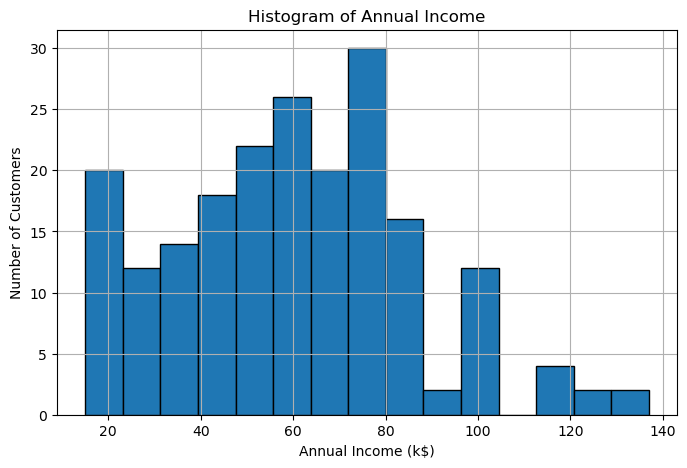

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['Annual Income (k$)'], bins=15, edgecolor='black')
plt.title('Histogram of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

In [ ]:
# plot a histogram of the Spending score. Do you see any "local peaks", if so, how many?

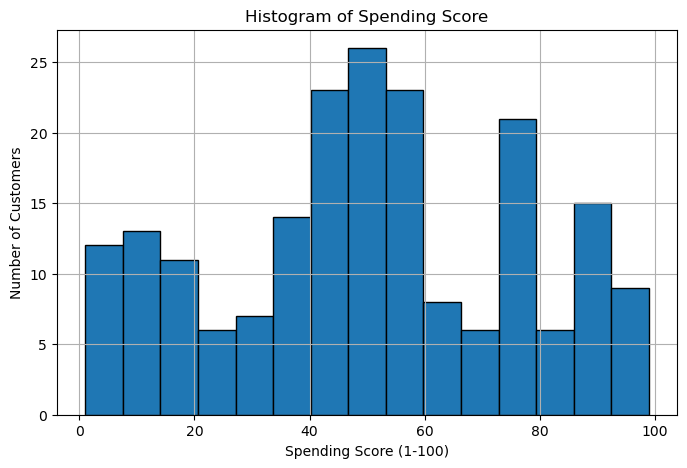

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(df['Spending Score (1-100)'], bins=15, edgecolor='black')
plt.title('Histogram of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

In [ ]:
# Find the correlation between the features

In [15]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


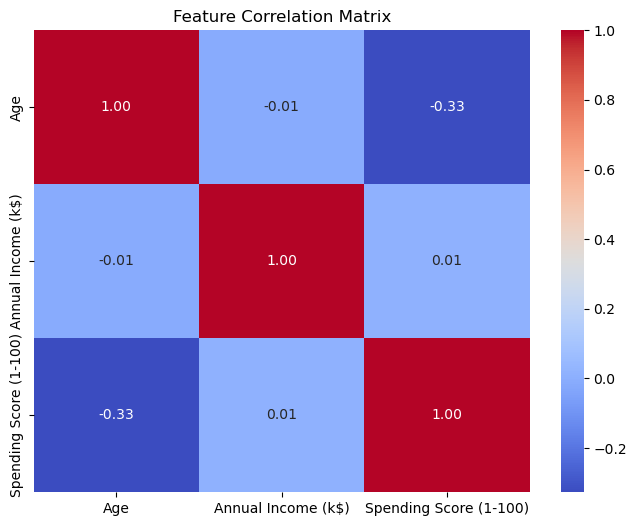

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# Interpret the correlation between the features
# what is the correlation between Age and Annual income?
# What is the correlation between Age and spending score?
# What is the correlation between spending score and income?

Q1: Younger and older customers are just as likely to have high or low incomes, so age doesn’t seem to predict income

Q2: As customers get older they tend to have lower annual incomes, and as customers get younger they tend to have higher incomes, but the relationship isn't very strong. It’s a moderate negative correlation.

Q3: People with high incomes aren’t necessarily big spenders, and people with low incomes aren’t necessarily frugal — income doesn't help us predict spending behavior in this dataset.

In [ ]:
# Use the plt.scatter function to create a scatter plot between the Spending Score and Annual Income

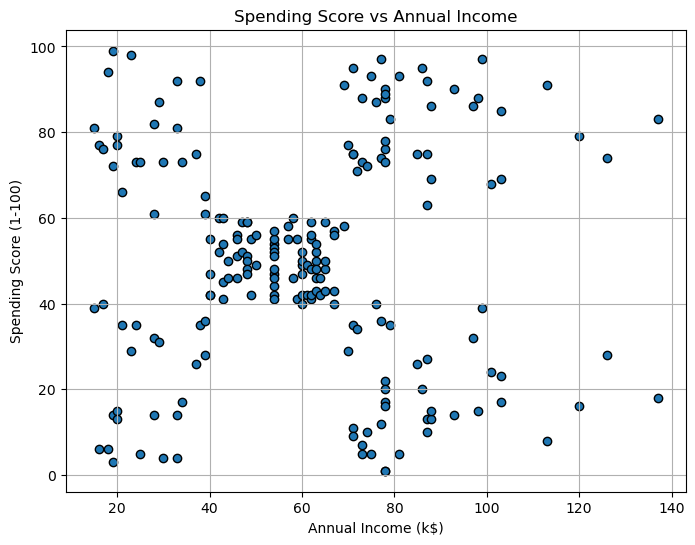

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], edgecolor='black')
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [ ]:
# Do you see any clusters in the data? If so, how many clusters do you see?
# What is the interpretation of these clusters?

Yes, there are clusters in the data. It looks like there are about 5 distinct groups based on how much people earn and how much they spend. These groups represent different customer types. For example, some people have low income but spend a lot, while others have high income but spend very little.

In [ ]:
# Now are going to fit kmeans clustering to the data with 3 clusters

In [ ]:
# Extract the features Annual income and spending score into a new data frame

In [21]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Standardize the new data frame using the StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Use K means clustering to fit 3 clusters to the data

In [57]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Now plot the 3 clusters, use the colors red, green and blue.

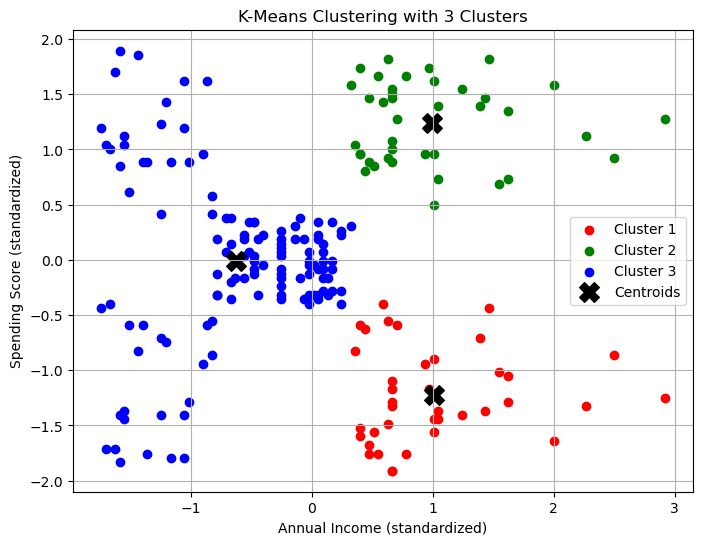

In [35]:

labels = kmeans.labels_
plt.figure(figsize=(8, 6))

plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], c='red', label='Cluster 1')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], c='green', label='Cluster 2')
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], c='blue', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 3 Clusters')
plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Interpret the 3 clusters

In [ ]:
# Remember the x axis is Annual income, and the y axis is spending score. 
# You can interpret the clusters by looking at their position. 
#For example, the cluster on the bottom right is people who have avg to high income but spend less.

The K-Means clustering revealed three distinct customer segments based on annual income and spending score. One cluster represents customers with average to high income but low spending habits, suggesting they may be more budget-conscious or saving-oriented. Another cluster includes high-income individuals who also have high spending scores, making them likely to be the mall’s most valuable and luxury-driven shoppers. The third cluster is made up of customers with lower income levels who tend to spend moderately or even heavily, possibly indicating younger shoppers or those who prioritize retail spending despite limited income.

In [ ]:
# Now fit k means with 5 clusters and interpret the results
# use the colors red, green, blue, purple, and pink

In [59]:
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_5.fit(X_scaled)
labels_5 = kmeans_5.labels_

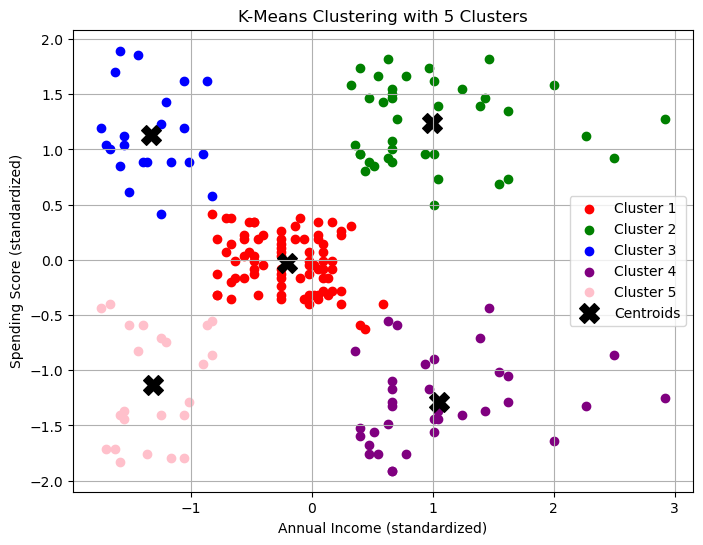

In [41]:
plt.figure(figsize=(8, 6))

colors = ['red', 'green', 'blue', 'purple', 'pink']

for i in range(5):
    plt.scatter(X_scaled[labels_5 == i, 0], X_scaled[labels_5 == i, 1], 
                c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], 
            c='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Interpret the 5 clusters as before.

With five clusters, the segmentation becomes more detailed and reveals unique customer groups. The green cluster in the top right shows customers with high income and high spending, likely representing premium or high-value shoppers. The purple cluster at the bottom right includes customers with high income but low spending, suggesting a more frugal or saving-oriented group. The blue cluster in the top left features customers with low to average income and high spending, possibly indicating younger or more impulsive buyers. The pink cluster at the bottom left represents low income and low spending customers, who may be less engaged or budget-conscious. Lastly, the red cluster in the center includes average earners with moderate spending, likely representing the mall’s core, middle-ground customer base.

In [ ]:
# Now use the elbow plot to pick the optimal number of clusters
# compare with the gap statistic method. You can use the function defined in the lab

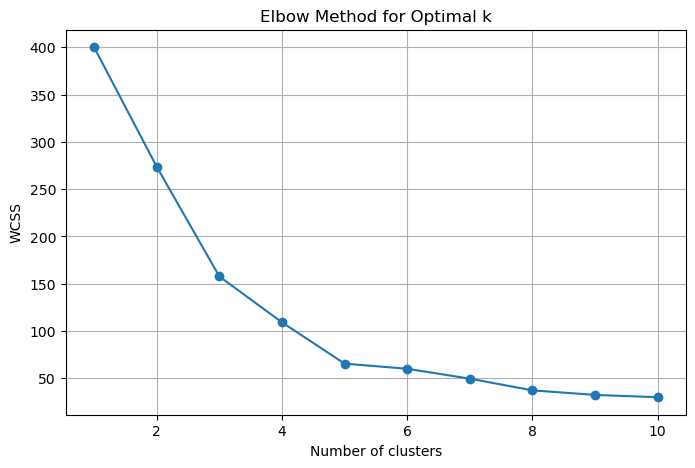

In [61]:
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [45]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.utils import resample

def gap_statistic(X, refs=None, n_refs=10, max_clusters=10):
    gaps = []
    deviations = []
    shape = X.shape
    if refs is None:
        refs = np.random.random_sample(size=(n_refs, shape[0], shape[1]))
    
    for k in range(1, max_clusters + 1):
        km = KMeans(n_clusters=k, init='k-means++', random_state=42)
        km.fit(X)
        orig_disp = np.mean(np.min(pairwise_distances(X, km.cluster_centers_), axis=1))
        
        ref_disps = []
        for i in range(n_refs):
            km.fit(refs[i])
            ref_disp = np.mean(np.min(pairwise_distances(refs[i], km.cluster_centers_), axis=1))
            ref_disps.append(ref_disp)
        
        gap = np.log(np.mean(ref_disps)) - np.log(orig_disp)
        sd_k = np.std(np.log(ref_disps)) * np.sqrt(1 + 1 / n_refs)
        
        gaps.append(gap)
        deviations.append(sd_k)
    
    return gaps, deviations

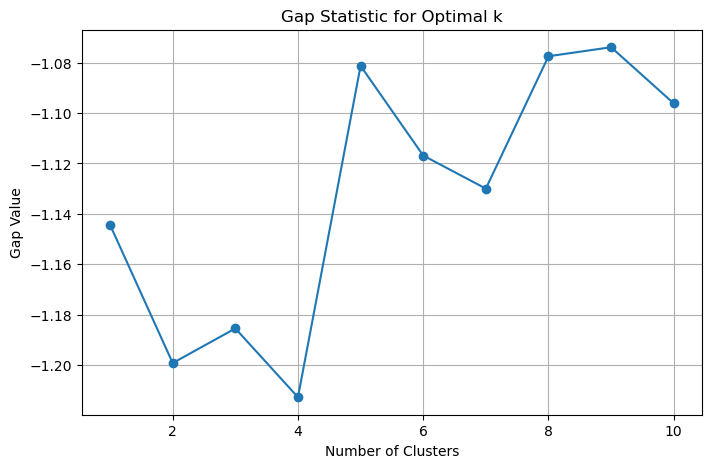

In [63]:
gaps, deviations = gap_statistic(X_scaled, n_refs=10, max_clusters=10)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), gaps, marker='o')
plt.title('Gap Statistic for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Value')
plt.grid(True)
plt.show()

Based on the Gap Statistic plot the gap value peaks at k = 5, which suggests that 5 clusters provide the best separation compared to random reference data. This matches the elbow method above, where the curve began to flatten around 5 clusters. So both methods support using 5 clusters as the optimal choice for segmenting the customers in this dataset.